**Лаборатори 8**

П.Ундрал B241910036

In [ ]:
import networkx as nx  # Сүлжээний граф үүсгэх, боловсруулахад зориулсан NetworkX санг импортлох
import pandas as pd  # Өгөгдлийг хүснэгтэн хэлбэрээр боловсруулахад зориулсан Pandas санг импортлох
import matplotlib.pyplot as plt  # График дүрслэл хийх Matplotlib сангийн pyplot модулийг импортлох
import numpy as np  # Тоон өгөгдөл боловсруулахад зориулсан NumPy санг импортлох

In [ ]:
%matplotlib inline

In [ ]:
# CSV файлаас датаг уншиж график байгуулах функц
def read_net_w(filename): #Файл унших функц.
    g = nx.Graph() #NetworkX ашиглан хоосон сүлжээ үүсгэх
    with open(filename) as f: # файлыг унших
        f.readline()  # Толгой хэсгийг алгасах
        for line in f: #Бүх мөрийг унших.
            parts = line.strip().split(",") #Мөрийг тасдаж (split) эхлэл, төгсгөл, жинг нь авах.
            g.add_edge(parts[0], parts[1], weight=int(parts[2])) #Сүлжээний ирмэг нэмэх.
    return g

# Сүлжээг ачааллуулах
season = 6
g = read_net_w(f'got-edges.csv') #got-edges.csv файлыг уншиж g хувьсагчид хадгалах.

**Bridges and Local Bridges**

Энэхүү код нь got-edges.csv файлыг уншиж, гүүр байгаа эсэхийг шалгана. Хэрвээ сүлжээнд гүүр байгаа бол "True" гэж хэвлэнэ.

In [ ]:
nx.has_bridges(g) #Сүлжээнд "гүүр" (bridge) байгаа эсэхийг шалгах.

True

In [ ]:
list(nx.bridges(g)) #Гүүр болж буй ирмэгүүдийг жагсаах.

[('Jaime', 'Qyburn'),
 ('Jaime', 'Walton'),
 ('Tyrion', 'Doran'),
 ('Amory', 'Oberyn'),
 ('Jon', 'Orell'),
 ('Belwas', 'Illyrio'),
 ('Robb', 'Ramsay'),
 ('Craster', 'Karl'),
 ('Daenerys', 'Aegon'),
 ('Daenerys', 'Kraznys'),
 ('Daenerys', 'Rakharo'),
 ('Daenerys', 'Worm'),
 ('Davos', 'Cressen'),
 ('Davos', 'Salladhor'),
 ('Davos', 'Shireen'),
 ('Kevan', 'Lancel')]

Өгөгдсөн гүүр болж буй ирмэгүүдийн жагсаалт нь тухайн сүлжээнд гүүр болж буй ирмэгүүдийн нэрсийг агуулж байна. Гүүр бол сүлжээнд хамгийн чухал ирмэгүүдийн нэг бөгөөд тухайн ирмэгийг устгах эсвэл холболт хасах нь сүлжээг хоёр тусдаа бүрэлдэхүүнд хувааж, холболт алдагдуулдаг.

In [ ]:
list(nx.local_bridges(g, with_span=True)) #local гүүрүүдийг олж, span (зай) утгатай нь гаргах.

[('Jaime', 'Qyburn', inf),
 ('Jaime', 'Walton', inf),
 ('Robert', 'Jon Arryn', 3),
 ('Tyrion', 'Doran', inf),
 ('Tyrion', 'Janos', 3),
 ('Tyrion', 'Viserys', 3),
 ('Tywin', 'Val', 3),
 ('Amory', 'Oberyn', inf),
 ('Jon', 'Orell', inf),
 ('Belwas', 'Illyrio', inf),
 ('Lysa', 'Jon Arryn', 3),
 ('Robb', 'Ramsay', inf),
 ('Elia', 'Rhaegar', 3),
 ('Craster', 'Karl', inf),
 ('Daenerys', 'Aegon', inf),
 ('Daenerys', 'Kraznys', inf),
 ('Daenerys', 'Rakharo', inf),
 ('Daenerys', 'Worm', inf),
 ('Davos', 'Cressen', inf),
 ('Davos', 'Salladhor', inf),
 ('Davos', 'Shireen', inf),
 ('Kevan', 'Lancel', inf)]

"inf" (infinity):

Зарим гүүрүүдийн хувьд span утга нь inf буюу төгсгөлгүй утга байна. Энэ нь тухайн гүүрийг устгаснаар сүлжээг хоёр хэсэгт хуваахад шаардлагатай алхамуудын тоо тодорхойгүй, эсвэл сүлжээний бүтцэд тухайн ирмэг нь нэгдмэл байдлыг хадгалж байна гэсэн үг юм. Эдгээр гүүрүүд нь сүлжээгээ хоёр хэсэгт хуваахгүй.

Зай (span) нь 3:

Зарим гүүрүүдийн span нь 3 байна. Энэ нь тухайн гүүрийг устгаснаар сүлжээг хоёр тусдаа хэсэгт хуваахад 3 алхам хэрэгтэй болохыг илэрхийлдэг.

Жишээ нь:

('Robert', 'Jon Arryn', 3)
('Tyrion', 'Janos', 3)
('Tyrion', 'Viserys', 3)
('Lysa', 'Jon Arryn', 3) гэх мэт.


Эдгээр гүүрүүд нь сүлжээг хоёр хэсэгт хуваахад тодорхой хэмжээний хүнд суртал үүсгэж болох бөгөөд эдгээр гүүрүүдийн байршил нь сүлжээг тодорхой нэгдмэл байдлаар холбож байгааг харуулж байна.


**Tie Strength - Холбоосын чадал**

In [ ]:
def node_overlap(g): #Сүлжээний бүх ирмэгийн хөршийн давхцлыг тооцоолох функц.
    for u, v in g.edges():
        n_u = set(g.neighbors(u)) #u оройтой хөршүүдийг авах.
        n_v = set(g.neighbors(v)) #v оройтой хөршүүдийг авах.
        overlap = len(n_u & n_v) / len(n_u | n_v) if n_u | n_v else 0 #Давхцсан хөршүүдийг нийт хөршүүд дээр хуваах.
        g[u][v]['overlap'] = overlap #Энэ утгыг тухайн ирмэгт хадгалах.
    return g

Энэхүү node_overlap функц нь сүлжээнд бүх ирмэгүүдийн хөршийн давхцлыг тооцоолох зориулалттай юм.

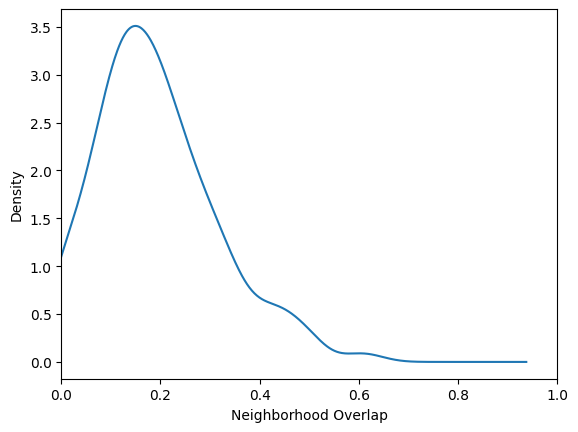

In [ ]:
def node_overlap(g): #Сүлжээний бүх ирмэгийн хөршийн давхцлыг тооцоолох функц.
    for u, v in g.edges():
        n_u = set(g.neighbors(u))  #u оройтой хөршүүдийг авах.
        n_v = set(g.neighbors(v))  #v оройтой хөршүүдийг авах.
        overlap = len(n_u & n_v) / len(n_u | n_v) if n_u | n_v else 0 #Давхцсан хөршүүдийг нийт хөршүүд дээр хуваах.
        g[u][v]['overlap'] = overlap #Энэ утгыг тухайн ирмэгт хадгалах.
    return g

g = node_overlap(g)

weights = [e[-1]['overlap'] for e in g.edges(data=True)] #Ирмэг бүрийн давхцлын хэмжээг хадгалах.
pd.DataFrame(weights)[0].plot.kde() #KDE (Kernel Density Estimation) график зурах.
plt.xlabel("Neighborhood Overlap") #X тэнхлэгийн гарчиг.
plt.xlim(0, 1) #Хязгаар тогтоох.
plt.show() #Графикийг харуулах.

Kernel Density Estimation (KDE) график нь сүлжээгийн ирмэгүүдийн хөршийн давхцлын тархалтыг харуулах бөгөөд энэ нь давхцлын хэмжээ хэрхэн тархаж байгааг үзүүлнэ.

Давхцал нь 0 байх үед хоёр узелын хөршүүдийн давхцал байхгүй.

Давхцал нь 1 байх үед хоёр узелын хөршүүдийн хамаарал 100% байна.

Энэ график нь хэрхэн сүлжээгийн узелуудын хоорондын давхцал хэрхэн тархаж байгааг, эдгээр харилцаа нь сүлжээг хэрхэн бүтэцтэй байлгах талаар ойлголт өгнө.

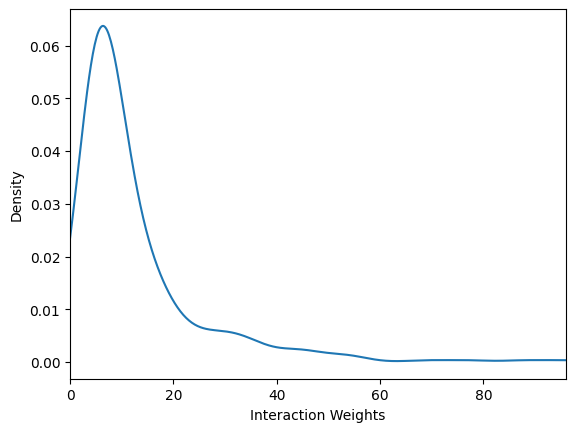

In [ ]:
weights_got = [d['weight'] for _, _, d in g.edges(data=True)] #Ирмэгийн жингүүдийг хадгалах.
pd.DataFrame(weights_got)[0].plot.kde() #Жингийн KDE график.
plt.xlabel("Interaction Weights") #X тэнхлэгийн гарчиг.
plt.xlim(0, max(weights_got))
plt.show()

Энэхүү код нь сүлжээгийн ирмэгийн жингүүдийн Kernel Density Estimation (KDE) графикийг зурах зорилготой юм.

Энэ график нь сүлжээгийн ирмэгүүдийн жингийн тархалтыг харуулах бөгөөд хэрвээ таны сүлжээний ирмэгүүд ихэнхдээ нэгэн зэрэг олон төрлийн жинтэй байвал график нь янз бүрийн жингийн тархалтыг үзүүлнэ.

**Network Resilience**

In [ ]:
er = nx.erdos_renyi_graph(1000, 0.001) #er — Эрдөш-Рэний загвараар үүсгэсэн санамсаргүй граф.
ba = nx.barabasi_albert_graph(1000, 2) #ba — Барабаси-Алберт загвараар үүсгэсэн scale-free сүлжээ.

Эдгээр хоёр графыг нэг дор үзүүлэхийн тулд plt.subplot-ийг ашиглаж байна.

Зүүн талд нь Эрдөш-Рэний граф, баруун талд нь Барабаси-Алберт графыг харуулна.


node_size=20 нь оройны хэмжээ (хугацаа).

with_labels=False нь оройг нэрлэж харуулахгүй гэсэн тохиргоо.

Эдгээр график нь сүлжээгийн бүтцийн ялгааг тодорхой харуулах бөгөөд эдгээр график нь хэрхэн ялгаатай болохыг үнэлэхэд тусална.

In [ ]:
er_degs = list(dict(er.degree()).values()) #er_degs — Эрдөш-Рэний сүлжээний орой бүрийн холболтын тоо.
ba_degs = list(dict(ba.degree()).values()) #ba_degs — Барабаси-Алберт сүлжээний орой бүрийн холболтын тоо.

Эрдөш-Рэний сүлжээнд орой бүрийн холболтын тоо тэнцүү хуваарилагдсан байдаг. Энэ нь сүлжээгийн бүтцийн санамсаргүй байдлыг харуулна.

Барабаси-Алберт сүлжээнд орой бүрийн холболтын тоо ихэвчлэн төвлөрсөн (scale-free) хуваарилалттай байдаг бөгөөд зарим оройнууд олон холболттой (хамгийн төвлөрсөн оройнууд), зарим оройнууд зөвхөн хэдхэн холболттой байдаг.

In [ ]:
def molloy_reed(degrees): # Холболтын дундаж тоонд суурилсан тогтвортой байдлын хэмжигдэхүүн.
    return (np.mean(degrees) * (np.mean(degrees) + 1)) / np.mean(degrees)

def breakdown_threshold(degrees): #Сүлжээ задрах шатыг тодорхойлох функц.
    K = molloy_reed(degrees) # Холболтын дундаж тоонд суурилсан тогтвортой байдлын хэмжигдэхүүнийг K хувьсагчид өгөв.
    return 1 - (1/(K-1))

molloy_reed функц нь сүлжээгийн холболтын дундаж тоог ашиглан тогтвортой байдлын хэмжигдэхүүн (K) тооцоолдог.


breakdown_threshold функц нь тухайн сүлжээг задрах хугацааг болон сүлжээгийн заагтай (breakdown) шугамыг тодорхойлдог.

In [ ]:
molloy_reed(er_degs) #Molloy-Reed хэмжигдэхүүн тооцож, тухайн сүлжээг холболтын дундаж тоонд суурилж тогтвортой байдал хэрхэн бий болсон болохыг харах.

np.float64(1.958)

Энэ утга нь Эрдөш-Рэний сүлжээгийн тогтвортой байдал ямар байгааг хэмжсэн болно. Хэрвээ энэ утга их байвал, сүлжээ нь илүү тогтвортой байж болох бөгөөд задралын үед илүү тэсвэртэй байна гэж үзэж болно.

In [ ]:
breakdown_threshold(er_degs) #Breakdown threshold нь сүлжээ эвдрэх хязгаарын хэмжээг тодорхойлно.

np.float64(-0.04384133611691032)

Энэ нь Эрдөш-Рэний сүлжээгийн эвдрэх хязгаарын хэмжээг илэрхийлнэ. Хэрвээ энэ утга өндөр байвал, сүлжээ нь эвдэхэд илүү тэсвэртэй байж магадгүй. Харин бага утга нь сүлжээг задлахад илүү эмзэг байдлыг илэрхийлнэ.

In [ ]:
molloy_reed(ba_degs) #Molloy-Reed нь энэ сүлжээг эхний холболтын тоог ашиглан тооцно.

np.float64(4.992)

Molloy-Reed тогтвортой байдлын хэмжигдэхүүн нь сүлжээгийн холболтын дундаж тоонд суурилсан тогтвортой байдлын хэмжээг тодорхойлж, сүлжээг эвдэхэд хэр тэсвэртэй эсвэл эмзэг болохыг тодорхойлдог.

In [ ]:
breakdown_threshold(ba_degs) #Breakdown threshold нь мөн энэ сүлжээг задрах хувь хэмжээг тооцно.

np.float64(0.7494989979959921)

Breakdown threshold нь сүлжээгийн эвдрэлд тэсвэртэй байдал болон сүлжээг задрах хязгаарыг тодорхойлж, сүлжээг хэр эмзэг эсвэл тэсвэртэй болохыг илэрхийлнэ.

**Random Failures**

In [ ]:
def random_node(g):
    return [np.random.choice(list(g.nodes()))]

def dismantle(g, function, **args): # Орой хасах замаар сүлжээний тогтвортой байдлыг судлах функц.
    total_nodes = g.number_of_nodes() # Сүлжээний нийт оройн тоог авах
    removed_nodes = [] # Устгагдсан оройнуудын хувь
    components = [] # Үлдэж буй хамгийн том холбоост хэсгийн хэмжээ

    while len(g.nodes()) > 1: # Сүлжээнд орой байгаа үед давтах
        n = function(g, **args)[0] # Сонгогдсон оройг авах
        g.remove_node(n) # Тухайн оройг устгах
        removed_nodes.append((len(removed_nodes) + 1) / total_nodes) # Устгагдсан оройн хувийг хадгалах

        comps = list(nx.connected_components(g)) # Үлдсэн холбоост хэсгүүдийг авах
        g_size = max(len(c) for c in comps) / total_nodes if comps else 0 # Хамгийн том холбоост хэсгийн хэмжээг тооцоолох
        components.append(g_size) # Үр дүнг хадгалах

    return removed_nodes, components

def get_sorted_nodes(g, score, reverse=True):
    nodes = score(g) # Орой бүрийн оноог авах
    if isinstance(nodes, dict): # Хэрэв утгууд нь dictionary бол
        nodes = sorted(nodes.items(), key=lambda x: x[1], reverse=reverse) #Оройнуудыг оноогоор нь буурч (эсвэл өсөх) эрэмбэлнэ.
    return [x[0] for x in nodes] # Зөвхөн оройнуудыг буцаах

def plot_dismantle(x, y):
    plt.plot(x, y) # График зурах
    plt.xlabel("Removed Nodes") # X тэнхлэгийн нэр
    plt.ylabel("Giant Component Size") # Y тэнхлэгийн нэр
    plt.show() # Графикийг харуулах

Эдгээр функцүүд нь сүлжээгийн тогтвортой байдал болон эвдрэл хэрхэн өөрчлөгдөхийг судлахад хэрэглэгддэг. Үүнийг ашиглан бид тухайн сүлжээг устгах замаар сүлжээний эвдрэл, эвдэрсэн хязгаар, болон хамгийн том холбоост хэсгийн хэмжээ хэрхэн өөрчлөгддөгийг харж болно. plot_dismantle функц нь эдгээр хувьсагчуудаас график гарган, сүлжээгийн тогтвортой байдлыг дүрслэхэд туслах болно.

**Targeted Attacks**

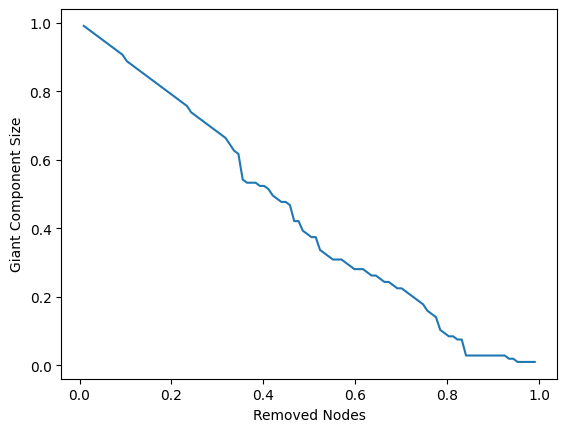

In [ ]:
h = g.copy() #g.copy() → Анхны сүлжээ g-ийн хуулбарыг h нэртэй шинэ хувьсагчид хадгална.
rn, comps = dismantle(h, random_node) #h сүлжээнээс санамсаргүй орой (random_node функц ашиглан) нэг нэгээр нь устгана.
plot_dismantle(rn, comps) #X тэнхлэг дээр устгагдсан оройнуудын хувь (rn), Y тэнхлэг дээр хамгийн том холбоост хэсгийн хэмжээ (comps) байгаа график гаргана.

Энэ код нь сүлжээг эвдэх замаар сүлжээгийн тогтвортой байдлыг хэрхэн хадгалахын тулд орой бүрийг санамсаргүй устгаж буй. График нь хэрхэн устгагдсан оройнуудын хувь нэмэгдэх тусам хамгийн том холбоост хэсгийн хэмжээ багасаж байгааг харуулна.

График нь сүлжээгийн эвдрэл, болон тэсвэртэй байдал, холболтын бүтэц хэрхэн өөрчлөгдөж байгааг харуулахад ашиглагдана.

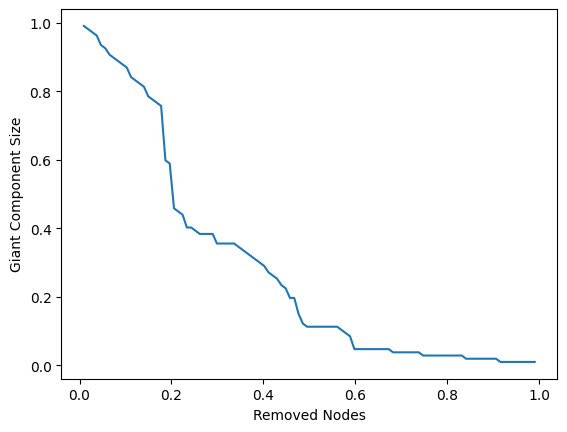

In [ ]:
h = g.copy() #g.copy() → Анхны сүлжээ g-ийн хуулбарыг h нэртэй шинэ хувьсагчид хадгална.
rn, comps = dismantle(h, get_sorted_nodes, score=nx.degree) #h сүлжээнээс оройнуудыг оноогоор нь эрэмбэлж, хамгийн өндөр оноотойгоос эхлэн устгаж эхэлнэ.
plot_dismantle(rn, comps) #X тэнхлэг дээр устгагдсан оройнуудын хувь (rn), Y тэнхлэг дээр хамгийн том холбоост хэсгийн хэмжээ (comps) байгаа график гаргана.

Энэ код нь сүлжээгийн оройнуудыг онолын (degree)-ийн дагуу эрэмбэлж, хамгийн өндөр холболттой оройгоор эхэлж устгаж, сүлжээгийн эвдрэлийн хязгаар болон тэсвэртэй байдлыг харуулах болно.

График нь устгагдсан оройнуудын хувь нэмэгдэх тусам хамгийн том холбоост хэсгийн хэмжээ хэрхэн өөрчлөгдөж байгааг харуулна. Эсрэгээр, хамгийн өндөр холболттой оройг устгаснаар сүлжээний эвдрэл илүү хурдан явагдаж магадгүй.

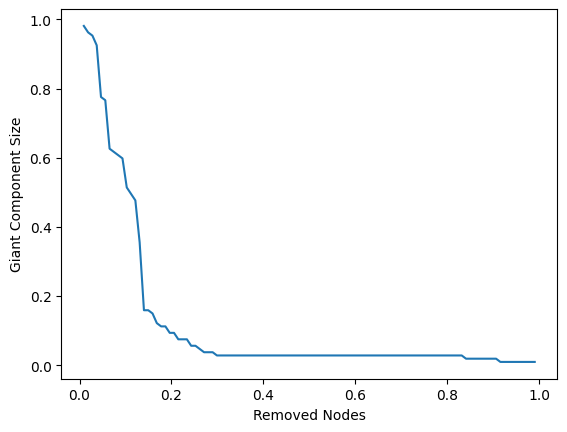

In [ ]:
h = g.copy() #g.copy() → Анхны сүлжээ g-ийн хуулбарыг h нэртэй шинэ хувьсагчид хадгална.
rn, comps = dismantle(h, get_sorted_nodes, score=nx.betweenness_centrality) #h сүлжээнд хамгийн их зам дамжуулдаг оройнуудыг эхэлж устгана.
plot_dismantle(rn, comps) #X тэнхлэг дээр устгагдсан оройнуудын хувь (rn), Y тэнхлэг дээр хамгийн том холбоост хэсгийн хэмжээ (comps) байгаа график гаргана.

Энэ код нь сүлжээгийн зам дамжуулалт (betweenness centrality) хамгийн өндөртэй оройг эхлээд устгаж, сүлжээгийн эвдрэл болон тэсвэртэй байдлыг судалж байгаа.

График нь устгагдсан оройнуудын хувь нэмэгдэх тусам хамгийн том холбоост хэсгийн хэмжээ хэрхэн өөрчлөгдөж байгааг харуулна. Зам дамжуулалт өндөртэй оройг устгах нь сүлжээг хурдан эвдэхэд хүргэж болзошгүй бөгөөд энэ нь сүлжээгийн бүтцийг сулруулах магадлалтай.

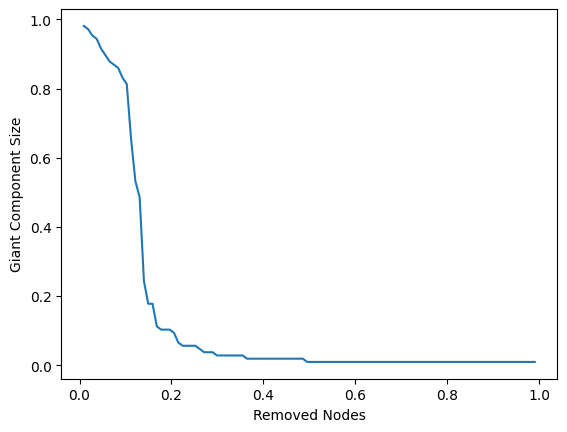

In [ ]:
h = g.copy() #g.copy() → Анхны сүлжээ g-ийн хуулбарыг h нэртэй шинэ хувьсагчид хадгална.
rn, comps = dismantle(h, get_sorted_nodes, score=nx.harmonic_centrality)  #h сүлжээнд хамгийн өндөр harmonic centrality-тэй оройнуудыг түрүүлж устгана.
plot_dismantle(rn, comps) #X тэнхлэг дээр устгагдсан оройнуудын хувь (rn), Y тэнхлэг дээр хамгийн том холбоост хэсгийн хэмжээ (comps) байгаа график гаргана.

Энэ код нь сүлжээгийн harmonic centrality хамгийн өндөртэй оройг эхлээд устгаж, сүлжээгийн эвдрэл болон тэсвэртэй байдлыг судалж байна.

График нь устгагдсан оройнуудын хувь нэмэгдэх тусам хамгийн том холбоост хэсгийн хэмжээ хэрхэн өөрчлөгдөж байгааг харуулна. Harmonic centrality нь оройг сүлжээгийн хамгийн "чухал" орой гэж үздэг бөгөөд ийм оройг устгах нь сүлжээгийн бүтцийг эвдэхэд хурдан нөлөөлж болзошгүй.